In [4]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold, cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_fscore_support, make_scorer, recall_score, f1_score, confusion_matrix, precision_score, balanced_accuracy_score
from sklearn.metrics import fbeta_score, ConfusionMatrixDisplay

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
         
from libs.print_cm import print_cm
from libs.loader import load_jobchange

from sklearn.model_selection import learning_curve, validation_curve

In [147]:
#Using Dataset for Data Scientist Job Change binary classification: 
# https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists?select=aug_train.csv
df = pd.read_csv("data/job_change_data_scientist.csv")

In [148]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [149]:
df_enc_0 = df.apply(LabelEncoder().fit_transform)
df_enc = df_enc_0.drop(columns=["enrollee_id","target"])
df_enc

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,5,85,1,0,2,0,5,21,8,6,0,35
1,77,48,1,1,2,0,5,6,4,5,4,46
2,64,14,3,1,0,0,5,15,8,6,5,82
3,14,52,3,1,3,0,1,20,8,5,5,51
4,50,45,1,0,2,2,5,21,4,1,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,55,71,1,1,2,0,2,5,8,6,0,41
19154,5,85,1,0,2,0,5,5,8,6,3,51
19155,5,85,1,0,2,0,5,21,4,5,3,43
19156,94,56,1,0,2,1,6,20,5,5,1,95


In [150]:
minMaxNorm = MinMaxScaler()
df_norm = minMaxNorm.fit_transform(df_enc)
pd.DataFrame(df_norm)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.040984,0.923913,0.333333,0.0,0.666667,0.0,0.833333,0.954545,1.000,1.000000,0.000000,0.145833
1,0.631148,0.521739,0.333333,1.0,0.666667,0.0,0.833333,0.272727,0.500,0.833333,0.666667,0.191667
2,0.524590,0.152174,1.000000,1.0,0.000000,0.0,0.833333,0.681818,1.000,1.000000,0.833333,0.341667
3,0.114754,0.565217,1.000000,1.0,1.000000,0.0,0.166667,0.909091,1.000,0.833333,0.833333,0.212500
4,0.409836,0.489130,0.333333,0.0,0.666667,0.4,0.833333,0.954545,0.500,0.166667,0.500000,0.029167
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.450820,0.771739,0.333333,1.0,0.666667,0.0,0.333333,0.227273,1.000,1.000000,0.000000,0.170833
19154,0.040984,0.923913,0.333333,0.0,0.666667,0.0,0.833333,0.227273,1.000,1.000000,0.500000,0.212500
19155,0.040984,0.923913,0.333333,0.0,0.666667,0.0,0.833333,0.954545,0.500,0.833333,0.500000,0.179167
19156,0.770492,0.608696,0.333333,0.0,0.666667,0.2,1.000000,0.909091,0.625,0.833333,0.166667,0.395833


In [5]:
# X = df_norm
# y = df_enc_0["target"]


# _y = df['target']
# y = _y.values.astype('int32')
# X = df_enc_0

X,y = load_jobchange()

In [175]:
dt= DecisionTreeClassifier()
dt_grid = GridSearchCV(
    estimator=dt, 
    param_grid={"max_depth": [3,5,7,10,15, 20]},
    scoring={'recall':make_scorer(recall_score), 'precision':make_scorer(precision_score), 'bal_ac': make_scorer(balanced_accuracy_score),
            'f1':make_scorer(f1_score, pos_label=1)},
    refit='precision',
#     return_train_score=True,
    cv=5
)

In [176]:
dt_grid.fit(X,y)
dfDtRes = pd.DataFrame(dt_grid.cv_results_)
dfDtRes

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,...,std_test_bal_ac,rank_test_bal_ac,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,0.009390,0.002411,0.008977,0.000644,3,{'max_depth': 3},1.0,1.0,1.0,1.0,...,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
1,0.009004,0.000874,0.008686,0.001441,5,{'max_depth': 5},1.0,1.0,1.0,1.0,...,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2,0.007527,0.000313,0.007331,0.000548,7,{'max_depth': 7},1.0,1.0,1.0,1.0,...,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
3,0.007266,0.000231,0.007734,0.000995,10,{'max_depth': 10},1.0,1.0,1.0,1.0,...,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
4,0.007220,0.000266,0.006718,0.000272,15,{'max_depth': 15},1.0,1.0,1.0,1.0,...,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
5,0.006990,0.000176,0.006847,0.000613,20,{'max_depth': 20},1.0,1.0,1.0,1.0,...,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1


In [177]:
cm_dt = confusion_matrix(y, dt_grid.predict(X))
print_cm(cm_dt,['0','1'])

              0     1 
        0 14381     0 
        1     0  4777 


In [195]:
from scipy.stats import randint

mlp =  MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, solver='sgd', learning_rate='invscaling', random_state=0)
parameters = {'momentum':np.arange(0.1, 0.9, 0.1),'alpha':np.linspace(0.0001, 0.014, 10),
             'learning_rate_init':np.linspace(0.0001, 0.005,10),
              }

# scorer = make_scorer(recall_score)
# scorer = make_scorer(recall_score,average='weighted')
# scorer = make_scorer(f1_score, average='weighted' )
scorer = make_scorer(f1_score)
# scorer = make_scorer(fbeta_score, average='weighted', beta=2)
# scorer= make_scorer(precision_score)
strat_cv = StratifiedKFold(5, shuffle=True,  random_state=0)

mlp_rand = RandomizedSearchCV(
    mlp,
    parameters,
    n_iter=100,
    scoring=scorer,
    cv=strat_cv,
    n_jobs=-1,
    verbose=1,
    random_state=0
)




In [196]:
mlp_rand.fit(X,y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/sdodge/work/omscs/cs7641/cs7641_assignments/env3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/sdodge/work/omscs/cs7641/cs7641_assignments/env3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/sdodge/work/omscs/cs7641/cs7641_assignments/env3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/sdodge/work/omscs/cs7641/cs7641_assignments/env3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=MLPClassifier(hidden_layer_sizes=(10,),
                                           learning_rate='invscaling',
                                           max_iter=500, random_state=0,
                                           solver='sgd'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': array([0.0001    , 0.00164444, 0.00318889, 0.00473333, 0.00627778,
       0.00782222, 0.00936667, 0.01091111, 0.01245556, 0.014     ]),
                                        'learning_rate_init': array([0.0001    , 0.00064444, 0.00118889, 0.00173333, 0.00227778,
       0.00282222, 0.00336667, 0.00391111, 0.00445556, 0.005     ]),
                                        'momentum': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])},
                   random_state=0, scoring=make_scorer(f1_score), verbose=1)

In [197]:
less_5 = pd.DataFrame(mlp_rand.cv_results_)['rank_test_score'] <= 5

filtered_series = pd.DataFrame(mlp_rand.cv_results_)[less_5].filter(['params','rank_test_score','mean_test_score'])
sorted_series =  (filtered_series.sort_values(by=['rank_test_score']))
out_rows = [r for r in sorted_series.values]
# type(pd.DataFrame(mlp_rand.cv_results_)[less_5]['params'])
for r in out_rows:
    print( f"rank:{r[1]} -- params{r[0]} score:{r[2]}")

pd.DataFrame(mlp_rand.cv_results_)[less_5]

rank:1 -- params{'momentum': 0.6, 'learning_rate_init': 0.0001, 'alpha': 0.0016444444444444447} score:0.4000170975783085
rank:2 -- params{'momentum': 0.1, 'learning_rate_init': 0.0006444444444444444, 'alpha': 0.0001} score:0.3993603172768464
rank:3 -- params{'momentum': 0.8, 'learning_rate_init': 0.0017333333333333333, 'alpha': 0.0001} score:0.39904538695300423
rank:4 -- params{'momentum': 0.6, 'learning_rate_init': 0.005, 'alpha': 0.012455555555555557} score:0.39901222269881426
rank:4 -- params{'momentum': 0.6, 'learning_rate_init': 0.005, 'alpha': 0.014} score:0.39901222269881426


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_momentum,param_learning_rate_init,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
32,0.604084,0.012622,0.004879,0.000317,0.6,0.0001,0.001644,"{'momentum': 0.6, 'learning_rate_init': 0.0001...",0.399066,0.401105,0.400085,0.400084,0.399746,0.400017,0.000659,1
35,0.927454,0.319959,0.006420,0.002605,0.8,0.001733,0.0001,"{'momentum': 0.8, 'learning_rate_init': 0.0017...",0.398408,0.399498,0.399079,0.398996,0.399246,0.399045,0.000362,3
60,0.536051,0.012664,0.006621,0.002426,0.6,0.005,0.012456,"{'momentum': 0.6, 'learning_rate_init': 0.005,...",0.398325,0.399498,0.398745,0.398996,0.399497,0.399012,0.000451,4
61,0.587423,0.010266,0.005628,0.000286,0.1,0.000644,0.0001,"{'momentum': 0.1, 'learning_rate_init': 0.0006...",0.399494,0.399579,0.399158,0.398992,0.399579,0.399360,0.000241,2
79,0.535073,0.011371,0.007790,0.001966,0.6,0.005,0.014,"{'momentum': 0.6, 'learning_rate_init': 0.005,...",0.398325,0.399498,0.398745,0.398996,0.399497,0.399012,0.000451,4


In [85]:
print(mlp_rand.best_params_,
mlp_rand.best_score_)

# {'momentum': 0.5,
#  'learning_rate_init': 0.001,
#  'learning_rate': 'invscaling',
#  'alpha': 0.0097}
# mlp_rand.best_params_


{'momentum': 0.6, 'learning_rate_init': 0.0001, 'alpha': 0.0016444444444444447} 0.4796554074925439


In [79]:
mlp_best = mlp_rand.best_estimator_
mlp_best.loss_curve_
mlp_best.n_iter_



13

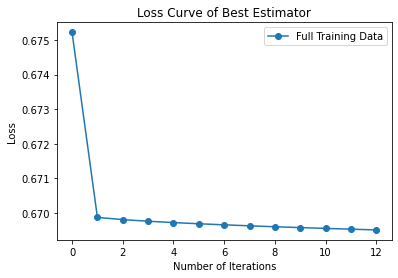

In [80]:
# mlp_best.fit(X,y)
b = mlp_best.loss_curve_


plt.figure()
plt.title("Loss Curve of Best Estimator")
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.plot(b, 'o-', label="Full Training Data")
plt.legend(loc="best")
plt.show()

## Added after meeting, Playing with results

Here I am trying out the best parameters and looking at how to ensure the number of iterations is at least a certain value.  The iterations for the best estimator were stopping at a number like 13 or 15, but to get a wider loss curve that goes out to larger amounts of iterations, the "tol" paramter and n_iter_no_change come to use

In [6]:
# mlp_target =  MLPClassifier(hidden_layer_sizes=(5,), max_iter=500, solver='sgd',
#                             momentum=0.5, learning_rate_init=0.0015, learning_rate='invscaling',
#                          alpha=0.007, tol=0.001, n_iter_no_change=100)

# 1:00PM {'momentum': 0.5, 'learning_rate_init': 0.0017, 'alpha': 0.0041}
# 3:22pm {'momentum': 0.1, 'learning_rate_init': 0.0008, 'alpha': 0.0126}   0.85 Recall
# 5:33pm {'momentum': 0.8, 'learning_rate_init': 0.0017000000000000001, 'alpha': 0.0025} 0.68 F1-weighited
# 5:46pm {'momentum': 0.8, 'learning_rate_init': 0.002, 'alpha': 0.0088} 0.71 fbeta score beta=2
# F8:22AM {'momentum': 0.1, 'learning_rate_init': 0.0008, 'alpha': 0.0126} 0.38 f1 pos_label=1
# F1:10PM {'momentum': 0.1, 'learning_rate_init': 0.0008, 'alpha': 0.0109111} 0.452 f1 pos_label=1, but after validation of best layer size 50
# F1:24PM {'momentum': 0.4, 'learning_rate_init': 0.0008, 'alpha': 0.014} 0.738 fbeta score beta=2
# F1:39PM {'momentum': 0.6, 'learning_rate_init': 0.0008, 'alpha': 0.0016444444444444447} 0.756 recall weighted
# F1:44PM {'momentum': 0.1, 'learning_rate_init': 0.0008, 'alpha': 0.010911111111111111} 0.451 recall plain
# F1:48PM {'momentum': 0.1, 'learning_rate_init': 0.0001, 'alpha': 0.010911111111111111} 0.6981 recall plain, just dropped learning rate
# T1:00PM {'momentum': 0.1, 'learning_rate_init': 0.0035, 'alpha': 0.01091111111111} precision  is 0.6, good validatioin curve
# T5:26PM {{'momentum': 0.6, 'learning_rate_init': 0.0001, 'alpha': 0.0016444444444444447} 0.4796554074925439 Recall plain

mlp_target_sgd =  MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, solver='sgd', learning_rate='invscaling',
                        momentum=0.6, learning_rate_init=0.00005, alpha=0.0016444444444444447, random_state=0 )

mlp_target =  MLPClassifier(hidden_layer_sizes=(7,),max_iter=500,random_state=0 )

In [224]:
#TODO - need to actually emulate a learning curve with X&y test/train data and CV
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify=y,random_state=0)

mlp_target.fit(X_train,y_train)
mlp_target.n_iter_


96

In [240]:
print(mlp_target.get_params())
print(scorer)
pd.DataFrame(y)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 500, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
make_scorer(f1_score)


,0
0,0
1,0
2,0
3,0
4,0
...,...
14363,0
14364,1
14365,0
14366,0


In [225]:
#Try cross_validate

cv_target = cross_validate(mlp_target, X, y, cv=5, scoring=scorer)
cv_target

{'fit_time': array([1.33049512, 1.13109612, 0.77222276, 1.02700806, 1.3511641 ]),
 'score_time': array([0.00172901, 0.00170016, 0.00160217, 0.00157619, 0.00155807]),
 'test_score': array([0.36241611, 0.48157248, 0.40513291, 0.36238981, 0.52370203])}

In [226]:
np.linspace(0.1,1,5)
np.logspace(-1,1,5)

def stats_pac( label, estimator, X_data, y_data ):
    print ('****** %s ******' % label)
    print ('Confusion matrix\n', confusion_matrix(y_data, estimator.predict(X_data)))
    predicted = estimator.predict(X_data)
    print ('Recall - label 0: %0.4f'% recall_score(y_data, predicted, pos_label=0))
    print ('Recall - label 1: %0.4f'% recall_score(y_data, predicted))

    print ('Precsion - label 0: %0.4f'% precision_score(y_data, predicted, pos_label=0))
    print ('Precsion - label 1: %0.4f'% precision_score(y_data, predicted))
    
    sample_wt = [ 3 if i == 1 else 1 for i in predicted]
    print ('F1 Score macro: %0.4f'% f1_score(y_data, predicted, average='macro', sample_weight=sample_wt ))
    print ('F1 Score - plain: %0.4f'% f1_score(y_data, predicted ))
    print ('F1 Score - label 0 : %0.4f'% f1_score(y_data, predicted, pos_label=0 ))
    print ('F1 Score - label 1 : %0.4f'% f1_score(y_data, predicted, pos_label=1 ))
    print ('F1 Score - weighted avg : %0.4f'% f1_score(y_data, predicted, average='weighted' ))
    print ('F1 Beta - b=2 weighted avg : %0.4f'% fbeta_score(y_data,predicted, average='weighted', beta=2))

# stats_pac('MPL Random - ALL',mlp_rand.best_estimator_, X, y)
# stats_pac('MPL Random - Train',mlp_rand.best_estimator_, X_train, y_train)
stats_pac('MLP target - Train', mlp_target, X_train, y_train)
stats_pac('MLP target - Validation', mlp_target, X_test, y_test)



****** MLP target - Train ******
Confusion matrix
 [[7460 1168]
 [1352 1514]]
Recall - label 0: 0.8646
Recall - label 1: 0.5283
Precsion - label 0: 0.8466
Precsion - label 1: 0.5645
F1 Score macro: 0.7030
F1 Score - plain: 0.5458
F1 Score - label 0 : 0.8555
F1 Score - label 1 : 0.5458
F1 Score - weighted avg : 0.7783
F1 Beta - b=2 weighted avg : 0.7797
****** MLP target - Validation ******
Confusion matrix
 [[1860  297]
 [ 317  400]]
Recall - label 0: 0.8623
Recall - label 1: 0.5579
Precsion - label 0: 0.8544
Precsion - label 1: 0.5739
F1 Score macro: 0.7100
F1 Score - plain: 0.5658
F1 Score - label 0 : 0.8583
F1 Score - label 1 : 0.5658
F1 Score - weighted avg : 0.7853
F1 Beta - b=2 weighted avg : 0.7859


In [233]:
arr = np.logspace(0.5, 3, num=20)
arr.astype('int32')

array([   3,    4,    5,    7,   10,   14,   19,   26,   35,   48,   65,
         88,  119,  162,  219,  297,  402,  545,  738, 1000], dtype=int32)

In [234]:
variable_layers_size = arr.astype('int32')
range_list = [(v,) for v in variable_layers_size]
range_list


[(3,),
 (4,),
 (5,),
 (7,),
 (10,),
 (14,),
 (19,),
 (26,),
 (35,),
 (48,),
 (65,),
 (88,),
 (119,),
 (162,),
 (219,),
 (297,),
 (402,),
 (545,),
 (738,),
 (1000,)]

In [235]:

mlp_train_scores, mlp_test_scores = validation_curve(
    mlp_target, X, y, param_name="hidden_layer_sizes", param_range=range_list,
    scoring=scorer, cv=strat_cv, n_jobs=-1)
print("done")

done


In [236]:

train_scores_mean = np.mean(mlp_train_scores, axis=1)
train_scores_std = np.std(mlp_train_scores, axis=1)
test_scores_mean = np.mean(mlp_test_scores, axis=1)
test_scores_std = np.std(mlp_test_scores, axis=1)
print (variable_layers_size.shape,train_scores_mean.shape,test_scores_mean.shape)
df_1 = pd.DataFrame({'x':variable_layers_size,'train':train_scores_mean,'test':test_scores_mean}, index=variable_layers_size )
df_1

(20,) (20,) (20,)


,x,train,test
3,3,0.370132,0.371873
4,4,0.353452,0.353293
5,5,0.448264,0.433198
7,7,0.488421,0.476370
10,10,0.457805,0.446137
14,14,0.341043,0.329729
19,19,0.410469,0.398544
26,26,0.357298,0.334520
35,35,0.481890,0.457587
48,48,0.497762,0.473754


Text(0.5, 1.0, 'Neural Network Validation Curve:\n MLP hyperparameter Hidden Layer-1 Neuron Count\n Dataset 02: Job Change')

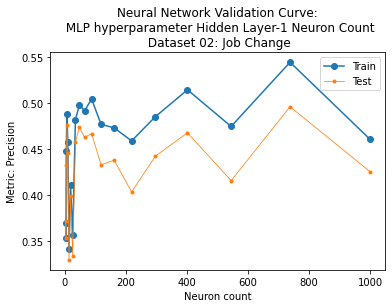

In [237]:

axs = plt.gca()
axs.plot(df_1['x'], df_1['train'], label='Train', linewidth=1.5, marker='o')
axs.plot(df_1['x'], df_1['test'], label='Test', linewidth=0.75, marker='.')
axs.legend(); axs.set_ylabel("Metric: Precision"); axs.set_xlabel("Neuron count")
axs.set_title('Neural Network Validation Curve:\n MLP hyperparameter Hidden Layer-1 Neuron Count\n Dataset 02: Job Change')

## Plot Learning rate hyper params

In [7]:
range_list = np.linspace(0.00005, 0.005,20)

In [9]:
scorer = make_scorer(f1_score)
strat_cv = StratifiedKFold(5, shuffle=True,  random_state=0)

mlp_train_scores, mlp_test_scores = validation_curve(
    mlp_target_sgd, X, y, param_name="learning_rate_init", param_range=range_list,
    scoring=scorer, cv=strat_cv, n_jobs=-1)
print("done")

done


In [10]:
train_scores_mean = np.mean(mlp_train_scores, axis=1)
test_scores_mean = np.mean(mlp_test_scores, axis=1)
print (range_list.shape,train_scores_mean.shape,test_scores_mean.shape)
df_1 = pd.DataFrame({'x':range_list,'train':train_scores_mean,'test':test_scores_mean} )

(20,) (20,) (20,)


In [11]:
df_1

,x,train,test
0,0.000050,0.278985,0.278177
1,0.000311,0.225724,0.223869
2,0.000571,0.253509,0.252693
3,0.000832,0.288276,0.285458
4,0.001092,0.317452,0.316144
5,0.001353,0.345492,0.341181
6,0.001613,0.352297,0.349144
7,0.001874,0.355452,0.355949
8,0.002134,0.358225,0.356283
9,0.002395,0.355827,0.356462


In [15]:
scorer

make_scorer(f1_score)

Text(0.5, 1.0, 'Neural Network Validation Curve: hyperparameter learning_rate_init')

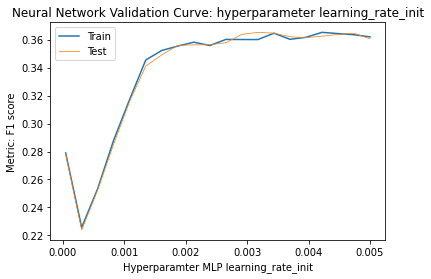

In [13]:

axs = plt.gca()
axs.plot(df_1['x'], df_1['train'], label='Train', linewidth=1.5)
axs.plot(df_1['x'], df_1['test'], label='Test', linewidth=0.75)
axs.legend(); axs.set_ylabel("Metric: F1 score"); axs.set_xlabel("Hyperparamter MLP learning_rate_init")
axs.set_title('Neural Network Validation Curve: hyperparameter learning_rate_init')



In [262]:
## Plot iterations

range_list_iter = np.linspace(1, 700, 15).astype('int32')
range_list_iter

array([  1,  50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600,
       650, 700], dtype=int32)

In [263]:
mlp_train_scores2, mlp_test_scores2 = validation_curve(
    mlp_target, X, y, param_name="max_iter", param_range=range_list_iter,
    scoring=scorer, cv=strat_cv, n_jobs=-1)

/Users/sdodge/work/omscs/cs7641/cs7641_assignments/env3.9.7/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sdodge/work/omscs/cs7641/cs7641_assignments/env3.9.7/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sdodge/work/omscs/cs7641/cs7641_assignments/env3.9.7/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sdodge/work/omscs/cs7641/cs7641_assignments/env3.9.7/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic

In [264]:

train_scores_mean = np.mean(mlp_train_scores2, axis=1)
test_scores_mean = np.mean(mlp_test_scores2, axis=1)
print (range_list_iter.shape,train_scores_mean.shape,test_scores_mean.shape)
df_2 = pd.DataFrame({'x':range_list_iter,'train':train_scores_mean,'test':test_scores_mean} )

(15,) (15,) (15,)


In [258]:
df_2

,x,train,test
0,1,0.265401,0.266681
1,50,0.436089,0.419843
2,100,0.469411,0.453892
3,150,0.457805,0.446137
4,200,0.457805,0.446137
5,250,0.457805,0.446137
6,300,0.457805,0.446137
7,350,0.457805,0.446137
8,400,0.457805,0.446137
9,450,0.457805,0.446137


Text(0.5, 1.0, 'Neural Network Iterations Curve')

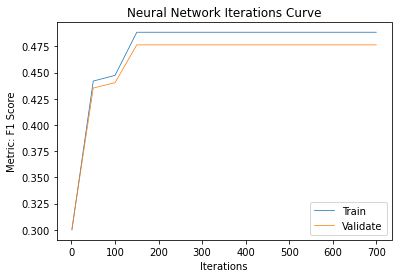

In [265]:
axs = plt.gca()
axs.plot(df_2['x'], df_2['train'], label='Train', linewidth=0.75)
axs.plot(df_2['x'], df_2['test'], label='Validate', linewidth=0.75)
axs.legend(); axs.set_ylabel("Metric: F1 Score"); axs.set_xlabel("Iterations")
axs.set_title('Neural Network Iterations Curve')


In [260]:
mlp_target.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (10,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}